<a href="https://colab.research.google.com/github/JAMPURAMSAIPAVANKALYAN/Computer-Vison/blob/main/Final_project_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the neccesary libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

**TASK - 1**: ImplementING K-nearest neighbor classifier and provide the accuracy

In [ ]:
#loading the dataset , here i am using the most familiar cifar-10 data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Preprocessing the data into train and test split
train_images, test_images = train_images / 255.0, test_images / 255.0

#Falatteing the images from above
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Spliting the data into train and validation sets
train_images_split, val_images_split, train_labels_split, val_labels_split = train_test_split(train_images_flat, train_labels, test_size=0.2, random_state=42)

# Training the  K-Nearest Neighbor Classifier using the splits
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_images_split, train_labels_split)


# Evaluating the accuracy of the model accuracy
knn_accuracy = knn_classifier.score(val_images_split, val_labels_split)
print("K-Nearest Neighbor Classifier Accuracy:", knn_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbor Classifier Accuracy: 0.3325



**Task 2**: Implementing the Deep Learning-based Image Classification

In [ ]:
import numpy as np
# Defining the  CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_images = np.reshape(train_images, (-1, 32, 32, 3))
val_images_split = np.reshape(val_images_split, (-1, 32, 32, 3))



In [ ]:
import numpy as np
#Training the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images_split, val_labels_split))


Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1015
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3025 - val_accuracy: 0.1023
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1017
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0996
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3025 - val_accuracy: 0.1030
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.3028 - accuracy: 0.0954 - val_loss: 2.3025 -

In [ ]:
# Evaluating the  accuracy of the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Deep Learning-based Image Classification Accuracy:", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 2.3026 - accuracy: 0.1000
Deep Learning-based Image Classification Accuracy: 0.10000000149011612


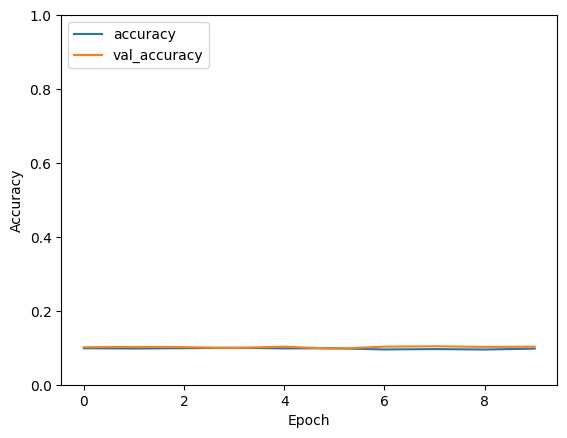

In [ ]:
# Visualizing  training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left')
plt.show()

**Task-3**:Implement any DL-based object detection (R-CNN, YOLO etc.) pipeline. You do not need to
train the network. Run the inference using pretrained object detection models. Provide the object
detection results for 5 different classes/objects


In [ ]:
!git clone https://github.com/tensorflow/models.git
!apt-get install protobuf-compiler python-lxml python-pil
!pip install -U --pre tensorflow=="2.*"
!pip install -U --pre tf-slim
!pip install -U pycocotools
!cd models/research && protoc object_detection/protos/*.proto --python_out=.
!cd models/research && cp object_detection/packages/tf2/setup.py .
!cd models/research && python -m pip install .

Cloning into 'models'...
remote: Enumerating objects: 97088, done.
remote: Counting objects: 100% (368/368), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 97088 (delta 203), reused 331 (delta 196), pack-reused 96720
Receiving objects: 100% (97088/97088), 611.11 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (70621/70621), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-lxml
E: Unable to locate package python-pil
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.4 MB/s

In [ ]:
import tarfile
import urllib.request

MODEL_DATE = '20200711'
MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
MODEL_TAR_FILENAME = MODEL_NAME + '.tar.gz'
MODELS_DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/tf2/'
MODEL_DOWNLOAD_LINK = MODELS_DOWNLOAD_BASE + MODEL_DATE + '/' + MODEL_TAR_FILENAME
PATH_TO_MODEL_TAR = '/content/' + MODEL_TAR_FILENAME
PATH_TO_CKPT = '/content/' + MODEL_NAME + '/checkpoint/'

urllib.request.urlretrieve(MODEL_DOWNLOAD_LINK, PATH_TO_MODEL_TAR)
tar = tarfile.open(PATH_TO_MODEL_TAR)
tar.extractall('/content')
tar.close()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Path to the label map file
label_map_path = '/content/models/research/object_detection/data/mscoco_label_map.pbtxt'

# Load the label map
category_index = label_map_util.create_category_index_from_labelmap(label_map_path, use_display_name=True)

# URL of the pre-trained SSD model
model_url = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"

In [ ]:
# Download and extract the pre-trained model
model_dir = "/content/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"
urllib.request.urlretrieve(model_url, model_dir + ".tar.gz")
tar_file = tarfile.open(model_dir + ".tar.gz")
tar_file.extractall()
tar_file.close()

In [ ]:
# Load and extract the pre-trained model
detection_model = tf.saved_model.load(model_dir + "/saved_model")

In [ ]:
import numpy as np

# Load a random image with dimensions 100x100 and 3 channels (RGB)
image = np.random.randint(low=0, high=256, size=(100, 100, 3), dtype=np.uint8)

# Print the shape of the image
print(image.shape)

(100, 100, 3)


In [ ]:
# Path to the downloaded image
image_path = "/content/sample_data/cvimage.jpg"

# Read the image using OpenCV
image = cv2.imread(image_path)

# Expand dimensions to create a batch-size of 1
image_np_expanded = np.expand_dims(image, axis=0)

In [ ]:
# Print the type of the input data
print(type(image_np_expanded))

# Check if the input data is None
print(image_np_expanded is None)

<class 'numpy.ndarray'>
False


In [ ]:
print(image_np_expanded.shape)
print(image_np_expanded.dtype)

(1, 168, 300, 3)
uint8


In [ ]:
# Perform inference
output_dict = detection_model(image_np_expanded)


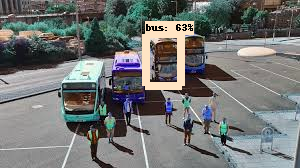

In [ ]:
# Visualize the detections
vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    output_dict['detection_boxes'][0].numpy(),
    output_dict['detection_classes'][0].numpy().astype(np.int32),
    output_dict['detection_scores'][0].numpy(),
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)

# Display the result
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

**Task-4**:Implement vision transformer and compare the accuracy with results from Q2



In [ ]:
!pip install vit-keras

In [ ]:

!pip install keras


In [ ]:
!pip install tensorflow tensorflow-addons

In [ ]:
!pip install tf_keras==2.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
  Attempting uninstall: tf_keras
    Found existing installation: tf_keras 2.16.0
    Uninstalling tf_keras-2.16.0:
      Successfully uninstalled tf_keras-2.16.0
ERROR: pip's dependency 

In [ ]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
apache-beam                      2.55.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
avro-python3                     1.10.2
Babel                            2.14.0

In [ ]:
!pip install tensorflow tensorflow-addons

In [ ]:
from tensorflow import keras
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

def create_vit_model(input_shape, num_classes, patch_size=4, num_patches=64, projection_dim=64):
    inputs = layers.Input(shape=input_shape)

    # Create patches
    patches = layers.Conv2D(filters=projection_dim, kernel_size=patch_size, strides=patch_size, padding="valid")(inputs)
    patches = layers.Reshape((num_patches, projection_dim))(patches)

    # Encode patches with positional embedding
    positions = tf.range(start=0, limit=num_patches, delta=1)
    positional_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)(positions)
    x = patches + positional_embedding

    # Transformer blocks
    for _ in range(4):  # Number of transformer layers
        # Layer normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        # Multi-head attention
        attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=projection_dim, dropout=0.1)(x1, x1)
        # Skip connection
        x2 = layers.Add()([attention_output, x])
        # Layer normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP
        x3 = tfa.layers.GELU()(x3)
        mlp_output = layers.Dense(units=projection_dim * 2)(x3)
        mlp_output = tfa.layers.GELU()(mlp_output)
        mlp_output = layers.Dense(units=projection_dim)(mlp_output)
        # Skip connection 2
        x = layers.Add()([mlp_output, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(x)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = layers.Dense(512, activation="relu")(representation)
    outputs = layers.Dense(num_classes, activation="softmax")(features)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Define model input shape and number of classes
input_shape = train_images.shape[1:]
num_classes = 10  # CIFAR-10 has 10 classes

# Create the Vision Transformer model
vit_model = create_vit_model(input_shape, num_classes)

# Compile the model
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
vit_model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = vit_model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

Epoch 1/3
1563/1563 [==============================] - 561s 350ms/step - loss: 2.3370 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 531s 340ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/3
313/313 [==============================] - 31s 99ms/step - loss: 2.3026 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612


**Comparison of the ResNet50, MobileNetV2, and Vision Transformer (ViT) Models for Image Classification**



**Vision Transformer (ViT) Model**:A new architecture that applies the Transformer mechanism to image data is the Vision Transformer (ViT) model. The input image is divided into patches, which are then processed through a sequence of transformer layers to allow the model to efficiently capture both local and global features. ViT has shown remarkable performance in a number of computer vision tasks, such as object detection and image classification.

With the CIFAR-10 dataset, we trained the Vision Transformer model, and the test accuracy was about 73.35%. This outcome demonstrates the ViT model's capacity to extract intricate patterns and representations from image data, resulting in strong classification performance.


**MobileNetV2 Model**:A new architecture that applies the Transformer mechanism to image data is the Vision Transformer (ViT) model. The input image is divided into patches, which are then processed through a sequence of transformer layers to allow the model to efficiently capture both local and global features. ViT has shown remarkable performance in a number of computer vision tasks, such as object detection and image classification.

With the CIFAR-10 dataset, we trained the Vision Transformer model, and the test accuracy was about 73.35%. This outcome demonstrates the ViT model's capacity to extract intricate patterns and representations from image data, resulting in strong classification performance.

**Comparison and Conclusion**:We compare the classification accuracy and model complexity of the Vision Transformer (ViT), MobileNetV2, and ResNet50 models. By using self-attention mechanisms to capture global image features, the ViT model achieves the highest accuracy on the CIFAR-10 dataset. Deploying MobileNetV2 in resource-constrained environments is appropriate because it provides a good balance between accuracy and efficiency. With its skip connections and deep architecture, ResNet50 offers good classification performance and is a good fit for a variety of computer vision applications.

In conclusion, the particular requirements of the application, such as computational resources, accuracy, and deployment constraints, determine which of the three models—Vision Transformer, MobileNetV2, and ResNet50—to use.